<font size="6"><b>[ML for NLP] Lecture 1B: Intro to ML</b></font>

This notebook consists of a introduction to Machine Learning with the following parts:

1. [Supervised Learning](#Supervised-Learning)
  1. [Classification](#Classification)
<!--     1. [Iris Dataset](#Iris-Dataset) -->
<!--     2. [Learning a Classifier](#Learning-a-classifier) -->
<!--     3. [Empirical Risk Minimization](#Empirical-Risk-Minimization) -->
<!--     4. [Introducing Uncertainty](#Introducing-uncertainty) -->
<!--     5. [Logistic Regression](#Logistic-regression) -->
<!--     6. [Maximum Likelihood Estimation](#Maximum-likelihood-estimation)  -->

  2. [Regression](#Regression)
<!--     1. [Linear Regression](#Linear-Regression) -->
<!--     2. [Polynomial Regression](#Polynomial-Regression) -->

  3. [Overfitting and Underfitting](#Overfitting-and-underfitting)

  4. [Deep Neural Networks](#Deep-Neural-Networks)
<!--     1. [No Free Lunch Theorem](#No-Free-Lunch-Theorem) -->
2. [Unsupervised Learning](#Unsupervised-Learning)
3. [Reinforcement Learning](#Reinforcement-Learning)


---

> Acknowledgments: This lecture is highly based on:
> - "Probabilistic Machine Learning: An Introduction (2021)" by Kevin Murphy
> - Lecture slides of the last LxMLS (http://lxmls.it.pt/), which were kindly provided by André Martins and Mário Figueiredo


---

# Introduction to Machine Learning

What is Machine Learning (ML)? A popular definition is given by Tom Mitchell:
> A computer program is said to learn from experience $E$ with respect to some class of tasks $T$, and performance measure $P$, if its performance at tasks in $T$, as measured by $P$, improves with experience $E$. 

There are many views of ML:
- Geometric perspective
- Algorithmic perspective
- Probabilistic perspective
- Optimization perspective
- Topological perspective
- ...

In this course we'll adopt a **probabilistic perspective**. As Shakir Mohamed, a researcher at DeepMind, put it
> Almost all of machine learning can be viewed in probabilistic terms, making probabilistic thinking fundamental. It is, of course, not the only view. But it is through this view that we can connect what we do in machine learning to every other computational science, whether that be in stochastic optimisation, control theory, operations research, econometrics, information theory, statistical physics or bio-statistics. For this reason alone, mastery of probabilistic thinking is essential.

## Supervised Learning

Here, the task $T$ is to learn a mapping $f$ from inputs $\mathbf{x} \in \mathcal{X}$ to outputs $\mathbf{y} \in \mathcal Y$.

- $\mathbf{x}$ is also called **features** (or predictors).
- $\mathbf{y}$ is also known as **label** or **target**. 

The experience $E$ is given as a dataset, known as **training set**: 

$$
\mathcal{D} = \{(\mathbf{x}_1, \mathbf{y}_1), (\mathbf{x}_2, \mathbf{y}_2), ..., (\mathbf{x}_N, \mathbf{y}_N)\},
$$

where $N$ is called the sample size or dataset size. 

The performance $P$ will depend on how we model the output space of the supervised learning problem. Although we will use classification and regression examples in this course, we will focus later on classification problems.

## Classification

In classification problem, the output space $\mathcal{Y}$ is a set of $C$ labels, known as **classes**, $\mathcal{Y} = \{1,2,...,C\}$. There are specific names depending on way we define $\mathcal{Y}$:

**Binary classification**: <br>
$\mathcal{Y}$ has two classes, e.g., $\mathcal{Y}=\{0, 1\}$ 

**Multiclass classification**: <br>
$\mathcal{Y}$ has more than two classes, e.g., $\mathcal{Y}=\{dog, cat, bird\}$ 

**Multilabel classification**: <br>
$\mathcal{Y}$ is a powerset and thus contains non mutually exclusive labels, e.g., $\mathcal{Y}=\{horror, drama, comedy, dark, adventure, ...\}$

### Example

Consider the problem of classifying Iris flowers into their 3 subspecies, Setosa, Versicolor and Virginica. In this case we have a multiclass classification problem with 3 labels:

<img src="https://machinelearninghd.com/wp-content/uploads/2021/03/iris-dataset.png" width="70%" />

In image classification, our input space $\mathcal{X}$ is a set of images, which can have a very high dimensionality: for an image with $C=3$ channels, and $W \times H$ pixels, we have $\mathbf{x}_i \in \mathbb{R}^{C\times W \times H}$. For example

<img src="https://miro.medium.com/max/540/1*uqueS5es63fscKvtpr4CLQ.png" width="70%" />

### Iris Dataset

Fortunately, some botanists have already identified 4 simple, but highly informative, numeric features — sepal length, sepal width, petal length, petal width — which can be used to distinguish the three kinds of Iris flowers. Let's take a look at the Iris dataset

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
X = iris.data  # also known as Design Matrix
y = iris.target

In [3]:
X.shape, y.shape

((150, 4), (150,))

In [4]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['label'] = pd.Series(iris.target_names[y], dtype='category')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Exploratory data analysis

The Iris dataset is an example of **tabular data**. In NLP, data is stored in text format, which needs special care to get transformed into numbers (a process known as feature preprocessing). 

Before jumping into a model, it is usually a great idea to do an exploratory data analysis to see if we find outliers, or to spot obvious patterns that might guide our choice for a ML method. 

Let's do that on the Iris dataset. Here, we will make the a **pair plot**, which shows plot a 2d figure of all features against each other.

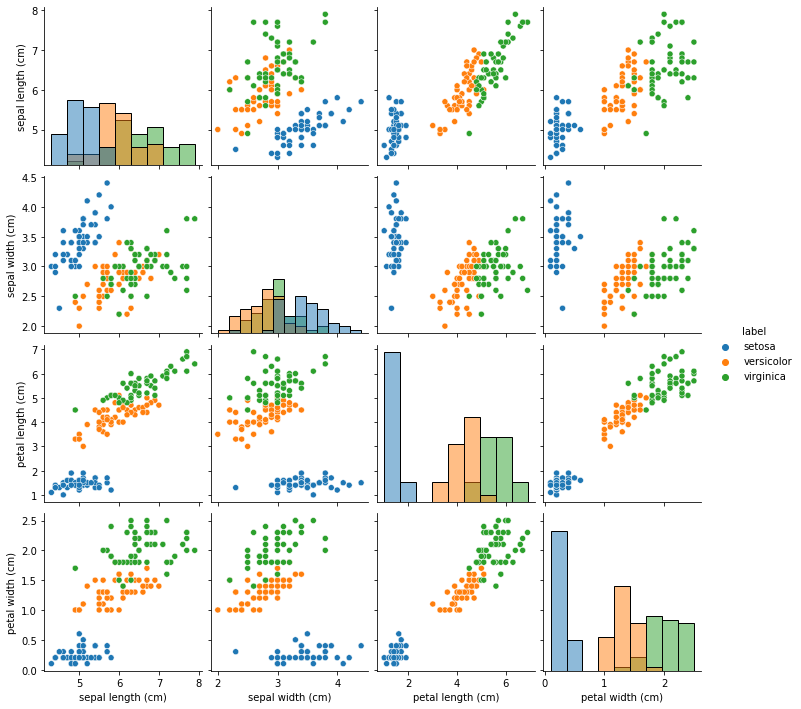

In [5]:
import seaborn as sns
sns.pairplot(df, vars=df.columns[0:4], hue='label', diag_kind='hist')

### Learning a classifier

Look at the plot of petal lengths vs petal width. The data seems linearly separable, right? This indicates that simple methods such as decision trees are potentialy helpful for this task. For example, we could create a classifier that does the following:

$$
f(x; \theta) = \begin{cases} \text{Setota if petal length $\leq 2.45$} \\ \text{Versicolor or Virginica otherwise} \end{cases}
$$

We could go further and create another rule for deciding between Versicolor and Virginica classes:

$$
f(x; \theta) = 
\begin{cases} 
\text{Setota if petal length $\leq 2.45$} \\ 
\text{Versicolor if petal length $> 2.45$ and petal width $\leq 1.75$} \\
\text{Virginica otherwise} \\
\end{cases}
$$

With this, we arrive at the following decision tree, which creates orthogonal cuts in the data space known as decision boundaries:

<img src="../figs/iris-decision-tree.png" width="80%" />

By manual inspection we see that only 6 data points are missclassified. The parameters $\theta$ in this case would store the thresholds $2.45$ and $1.75$ for each internal node of the tree.

Let's try that on code.

In [6]:
def f(petal_length, petal_width, theta=None):
    if petal_length <= theta[0]:
        return "setosa"
    elif petal_length > theta[0] and petal_width <= theta[1]:
        return "versicolor"
    return "virginica"

In [7]:
import numpy as np
theta = [2.45, 1.75]
petal_lengths = df["petal length (cm)"].to_numpy()
petal_widths = df["petal width (cm)"].to_numpy()
gold_labels = df["label"].to_numpy()
predicted_labels = [f(pl, pw, theta=theta) for pl, pw in zip(petal_lengths, petal_widths)]
predicted_labels = np.array(predicted_labels)

### Empirical Risk Minimization

The goal of supervised learning is to automatically come up with classifiers such as the decision tree that we found. The idea is that we can use this classifier to reliably predict the labels for any given input. 

A common way to measure performance on this task is in terms of the misclassification rate (or 1 - accuracy) on the training set:

$$
\mathcal{L}(\theta) = \frac{1}{N} \sum\limits_{n=1}^N \mathbb{I}(y_n \neq \hat{y}_n)
$$

where $\mathbb{I}(z)$ is the indicator function (returns 1 if $z$ is true, and 0 otherwise), and $\hat{y}_n = f(x_n; \theta)$ is our prediction. Let's compute the accuracy:


In [8]:
matches = gold_labels == predicted_labels
print('Hits: {}'.format(matches.sum()))
print('Accuracy: {:.4f}'.format(matches.mean()))
print('Miss: {}'.format(len(matches) - matches.sum()))
print('Miss rate: {:.4f}'.format(1 - matches.mean()))


Hits: 144
Accuracy: 0.9600
Miss: 6
Miss rate: 0.0400


However, we might want to penalize some errors more than others. For example, Versicolor and Virginia are clearly harder to classify, so we may emphasize their importance. To do this, we need an assymetric loss function $\ell(y, \hat{y})$. 

We define the **empirical risk** as the average of the loss on the training set.

$$
\mathcal{L}(\theta) = \frac{1}{N} \sum\limits_{n=1}^N \ell(y_n, \hat{y}_n)
$$

And we can design $\ell$ as we want. For example, using the 0-or-1 loss from before (i.e., $\mathbb{I}$) or as follows:


| Pred ↓ / Gold → | Setosa | Versicolor | Virginica |
| --- | --- | --- | --- |
| **Setosa** | 0 | 1 | 1 |
| **Versicolor** | 1 | 0 | 1 |
| **Virginica** | 10 | 10 | 0 |

We define the problem of model training as to find a setting of the parameters that minimizes the empirical risk on the training set:

$$
\hat{\theta} = \arg\min_\theta \mathcal{L}(\theta) =  \arg\min_\theta \frac{1}{N} \sum\limits_{n=1}^N \ell(y_n, f(x_n; \theta))
$$

This is called **empirical risk minimization**. 

However,  our true goal is **to generalize well on future data** that we have not yet seen rather than just do well on the training set. 

### Introducing uncertainty

Representing uncertainty in our prediction can be important for various applications. A simple way to do this is to use the Softmax transformation, which is defined as follows:

$$
S(\mathbf{a}) = \left[ \frac{e^{a_1}}{\sum_{i=1}^C e^{a_i}}, ..., \frac{e^{a_C}}{\sum_{i=1}^C e^{a_i}} \right]
$$

Or in code:
```python
def softmax(a):
    return np.exp(a) / np.exp(a).sum()
```

This transformation maps the logits $\mathbf{a} \in \mathbb{R}^{C}$ to probabilities. That is, it satisfies the constraints that $0 \leq S(a)_i \leq 1$ and $\sum_i S(a)_i = 1$. We thus define the model as:

$$
p(y = c \mid \mathbf{x}; \mathbf{\theta}) = S_c(\mathbf{x}; \mathbf{\theta})
$$


### Logistic regression
A common special case of this formulation arises when $f$ is an _affine function_ of the form:

$$
f(\mathbf{x}; \theta) = \mathbf{w}^\top \mathbf{x} + b = w_1 x_1 + w_2 x_2 + \cdots + w_D x_D + b
$$

where $\theta = (b, \mathbf{\theta})$ are the parameters of the model. This model is called **logistic regression**.

$\mathbf{w}$ is commonly known as **weights**, and $b$ is called the **bias**. We usually assume that $b$ is absorbed into the weights by definining $\tilde{\mathbf{w}} = [b, w_1, ..., w_D]$ and $\tilde{\mathbf{x}} = [1, x_1, ..., x_D]$. This makes $\tilde{\mathbf{w}}^\top \tilde{\mathbf{x}} = \mathbf{w}^\top \mathbf{x} + b$. 

### Maximum likelihood estimation

To train our model, it is common to use the negative log probability as our loss function:

$$
\ell(y_n, f(x_n; \theta)) = - \log p(y = c \mid \mathbf{x}; \mathbf{\theta})
$$

We will see the theoretical motivation for doing this later. For now, we can think of minimizing this loss for the entire dataset:

$$
NLL(\theta) = - \frac{1}{N} \sum\limits_{n=1}^{N} \log p(y = c \mid \mathbf{x}; \mathbf{\theta})
$$

This is called the **negative log likelihood** (NLL). If we minimize this, we can compute the **maximum likelihood estimate** or **MLE**.

$$
\hat{\theta}_{MLE} = \arg\min_\theta NLL(\theta)
$$

As we will see, this approach is very common for obtaining classification models.

## Regression

Now suppose that we want to predict a real-valued quantity $y \in \mathbb{R}$ instead of a class label $y \in \{1,...,C\}$. This is known as **regression**. 

For example, in the case of Iris flowers, $y$ could be the degree of toxicity if the flower is eaten, or the average height of the plant.

Regression is similar to classification, however, the output is real-valued, so we must adapt our loss function. The most common loss for regression is the **quadractic loss** or **$\ell_2$ loss**:

$$
\ell_2(y, \hat{y}) = (y - \hat{y})^2
$$

The empirical risk becomes the **mean squared error (MSE)**:

$$
MSE(\theta) = \frac{1}{N} \sum\limits_{n=1}^{N} (y_n - f(\mathbf{x}_n; \theta))^2
$$

### Linear Regression

As an example of a regression model, consider the following toy dataset:

In [9]:
from matplotlib import pyplot as plt
N = 40
X = np.linspace(0, 12, N)
jitter = np.random.normal(0, 0.05, size=(N,))
y = np.sin(0.001 * X**3) + jitter

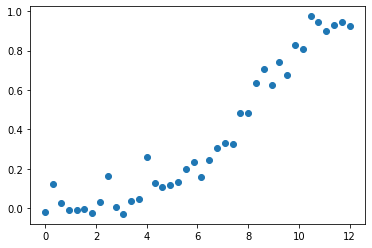

In [10]:
fig, ax = plt.subplots(1,1)
ax.plot(X, y, 'o')

Our goal  is to fit a line to this data, with slope $w$ and offset $b$: 

$$
y = wx + b
$$

Like the following

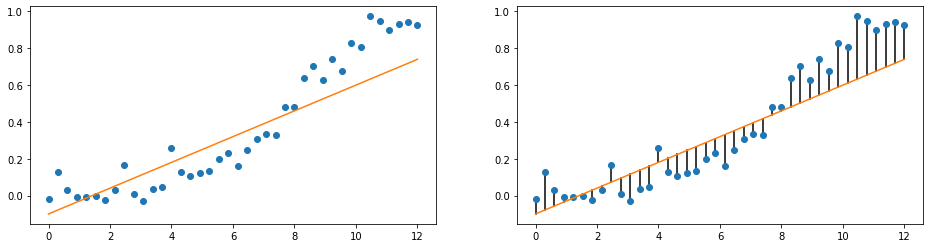

In [11]:
# our estimate
w = 0.07
b = -0.1
y_pred = w*X + b

# subplots
fig, ax = plt.subplots(1,2, figsize=(16,4))

# left plot
ax[0].plot(X, y, 'o')
ax[0].plot(X, y_pred, '-')

# right plot
ax[1].plot(X, y, 'o')
ax[1].plot(X, y_pred, '-')
for x0, y0, y_hat in zip(X, y, y_pred):
    ax[1].plot([x0, x0], [y0, y_hat], 'k-', zorder=-1)

By adjusting $\theta=(w, b)$, we can minimize the sum of squared errors (denoted as the black vertical bars), until we find the **least squares solution**

$$
\hat{\theta} = \arg\min_\theta MSE(\theta)
$$

The code below does that. 

In [12]:
# add columns of 1s
X_tilde = np.vstack([X, np.ones(len(X))]).T

# linear regression estimator
w_ls, b_ls = np.linalg.lstsq(X_tilde, y,  rcond=None)[0]
print(w, b)

# get predictions
y_pred_ls = w_ls*X + b_ls

0.07 -0.1


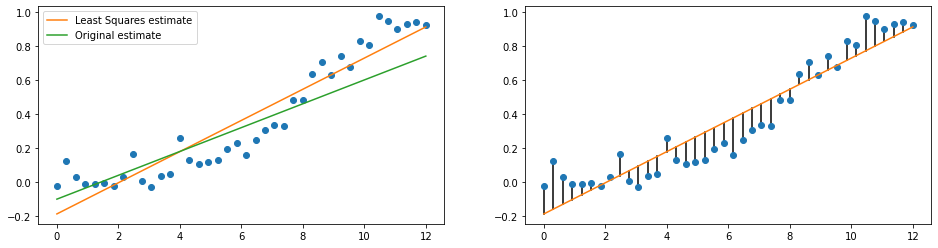

In [13]:
fig, ax = plt.subplots(1,2,figsize=(16,4))

ax[0].plot(X, y, 'o')
ax[0].plot(X, y_pred_ls, '-', label='Least Squares estimate')
ax[0].plot(X, y_pred, '-', label='Original estimate')
ax[0].legend()

ax[1].plot(X, y, 'o')
ax[1].plot(X, y_pred_ls, '-')
for x0, y0, y_hat in zip(X, y, y_pred_ls):
    ax[1].plot([x0, x0], [y0, y_hat], 'k-', zorder=-1)

We will study how the least squares method works in detail.

### Polynomial Regression



It is also possible to model more than a single input. For example, consider the task of predicting temperature as a function of 2d location in a room. Below we plot the results of a linear model of the following form (with $D=2$):

$$
f(\mathbf{x}; \theta) = w_1 x_1 + w_2 x_2 + b
$$

We can have a model with $D>2$ as well. But here we will focus on models with $D\leq2$ since it easier to visualize them.

In [14]:
N = 100
X = np.random.randn(N,2)
X_tilde = np.column_stack((np.ones(N), X))
y = - 0.5 * 0.1 * X[:,0] ** 2 - 0.5 * 0.1 * X[:,1] ** 2
w = np.linalg.lstsq(X_tilde, y, rcond=None)[0]
print(X.shape, y.shape, w.shape)

(100, 2) (100,) (3,)


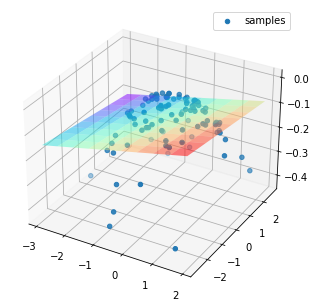

In [15]:
def plot_surface(X, y, w, quad=False):
    from mpl_toolkits.mplot3d import Axes3D
    fig = plt.figure()
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.scatter(X[:,0], X[:,1], y, label='samples')
    n = 10
    xrange = np.linspace(min(X[:,0]), max(X[:,0]), n)
    yrange = np.linspace(min(X[:,1]), max(X[:,1]), n)
    xx, yy = np.meshgrid(xrange, yrange)
    flatxx = xx.reshape((n**2, 1))
    flatyy = yy.reshape((n**2, 1))
    z = np.column_stack((flatxx, flatyy))
    z = np.column_stack((np.ones(n**2), z))
    if quad:
        z = np.column_stack((z, flatxx**2, flatyy**2))
    f = np.dot(z , w)
    ax.plot_surface(xx, yy, f.reshape(n, n), rstride=1, cstride=1, cmap='rainbow', alpha=0.5)
    ax.legend()
    
plot_surface(X, y, w)

Obviously, a linear model is not a good fit. We can improve the fit by using a polynomial regression model of degree $D$. This has the form $f(\mathbf{x}; \mathbf{w}) = \mathbf{w}^\top \phi(\mathbf{x})$, where $\phi(\mathbf{x})$ is a feature vector derived from the input, which has the following form:

$$
\phi(\mathbf{x}) = [1, x, x^2, ..., x^D]
$$

This is an example of **feature processing/enginerring**.

Let's use quadractic features in our linear regression.

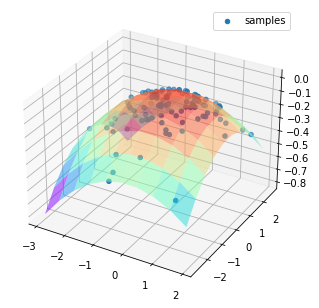

In [16]:
phi = np.column_stack((X_tilde, X**2))
w = np.linalg.lstsq(phi, y, rcond=None)[0]
plot_surface(X, y, w, quad=True)

This is a much better fit, but how many polynomials should we use in general?

### Overfitting and underfitting

To understand overfitting and underfitting, we can look at the performance of our model as we increase its flexibility, which can be simulated by increasing the degree $D$ of our polynomial regression.


 <img src="../figs/plots_poly_degrees.png" width="80%" />
 <center>Image from "Machine learning: a probabilistic perspective"</center>

**How can we pick a model of the right complexity?** <br>
If we use the training set to evaluate different models, we will always pick the most complex model (large $D$), since that will have the most degrees of freedom, and hence will have minimum loss since the model will interpolate the data. So instead we should pick the model with minimum test loss. The difference between the empirical risk of the training set and the test set is known as **generalization gap**.

In practice, we need to partition the data into three sets: 
- **training set:** used for learning the model parameters
- **validation set:** used for model selection, i.e., tuning hyperparameters
- **test set:** used to estimate future performance



<center>
    <br>
    ------------------------------------------
    <br>
    <b>Exercise</b>
    <br>
    Try to reproduce the 4 plots above.
    <br>
    ------------------------------------------
</center>

### Deep Neural Networks

Previously, we manually specified the transformation to the input features using a polynomial expansion $\phi$. But we can learn to do **feature extraction**  automatically from data, we just need to parametrize the function $\phi$ with its own parameters $\mathbf{V}$:

$$
f(\mathbf{x}; \mathbf{w}, \mathbf{V}) = \mathbf{w}^\top \phi(\mathbf{x}; \mathbf{V})
$$

We can recursively decompose the feature extractor $\phi(\mathbf{x}; \mathbf{V})$ into a composition of simpler functions. The resulting model then becomes a stack of $L$ nested functions:

$$
f(\mathbf{x}; \theta) = f_L(f_{L-1}(\cdots(f_1(\mathbf{x}))\cdots))
$$

where $f_\ell(\mathbf{x};\theta_\ell)$ is the function at layer $\ell$.

### No Free Lunch Theorem

> All models are wrong, but some models are useful. — George Box

**Which model is the best?**

Unfortunately, there is no single best model that works optimally for all kinds of problems — this is sometimes called the no free lunch theorem.

The reason is that a set of assumptions (also called inductive bias) that works well in one domain may work poorly in another. In practice, we find a good model by trial and error (e.g., using cross-validation).

## Unsupervised Learning

We just get observed “inputs” $\mathcal{D} = \{x_1, ..., x_N\}$ without any corresponding “outputs” $y_n$.

<img src="../figs/iris_clusters.png" width="80%" />
<center>
    A classical example of unsupervised learning is clustering, e.g., clustering data points using the petal features from the iris dataset.
</center>

Others applications include dimensionality reduction (e.g., PCA and autoencoders), factor analysis, etc.  

## Reinforcement Learning

In this class of problems, the agent has to learn how to interact with its environment. This can be encoded by means of a policy $a = \pi(x)$, which specifies which action to take in response to each possible input $x$. 

<img src="../figs/example_rl.png" width="80%" />
<center>
Classical examples include playing the Atari Space Invaders game (left), and controlling a humanoid robot in the MuJuCo simulator so it walks as fast as possible without falling over (right).
</center>

---